# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

#set temp rule
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

#define pass through count
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | butaritari
City not found. Skipping...
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | zelenoborsk
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | seymchan
City not found. Skipping...
Processing Record 12 of Set 1 | kutum
Processing Record 13 of Set 1 | almaznyy
Processing Record 14 of Set 1 | abu samrah
Processing Record 15 of Set 1 | ambanja
City not found. Skipping...
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | chapais
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | labuhan
Processing Record

Processing Record 36 of Set 4 | galesong
Processing Record 37 of Set 4 | muriti
City not found. Skipping...
Processing Record 38 of Set 4 | tirana
City not found. Skipping...
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | kaeo
Processing Record 41 of Set 4 | quelimane
Processing Record 42 of Set 4 | pauini
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | miri
Processing Record 46 of Set 4 | lazaro cardenas
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | kita
Processing Record 49 of Set 4 | lagoa
Processing Record 1 of Set 5 | bisira
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | dzidzantun
City not found. Skipping...
Processing Record 4 of Set 5 | copalillo
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | luganville
Processing Record 8 of Set 5 | teya
City not found. Skipping...
Processing R

Processing Record 25 of Set 8 | svetlogorsk
Processing Record 26 of Set 8 | inhambane
Processing Record 27 of Set 8 | popondetta
Processing Record 28 of Set 8 | soyo
City not found. Skipping...
Processing Record 29 of Set 8 | bagaces
Processing Record 30 of Set 8 | ninotsminda
Processing Record 31 of Set 8 | carnduff
Processing Record 32 of Set 8 | xinmin
Processing Record 33 of Set 8 | takoradi
City not found. Skipping...
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | chuy
Processing Record 36 of Set 8 | canton
Processing Record 37 of Set 8 | vostok
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | waounde
Processing Record 40 of Set 8 | pedernales
Processing Record 41 of Set 8 | tautira
Processing Record 42 of Set 8 | mercaderes
Processing Record 43 of Set 8 | joshimath
Processing Record 44 of Set 8 | jega
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | mitchell
Processing Record 47 of Set 8 | olkhovatka
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create a dictionary for establishing df
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
#establish df
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
#show the top of the df
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,0,RU,1578502413,85,69.70,170.27,-14.75,11.07
1,faya,20,SA,1578502413,82,18.39,42.45,60.80,6.93
2,georgetown,40,GY,1578502152,74,6.80,-58.16,84.20,11.41
3,butaritari,100,KI,1578502413,82,3.07,172.79,83.10,19.62
4,castro,40,CL,1578502414,81,-42.48,-73.76,50.00,12.75


In [7]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [8]:
#show df count
weather_dataframe.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

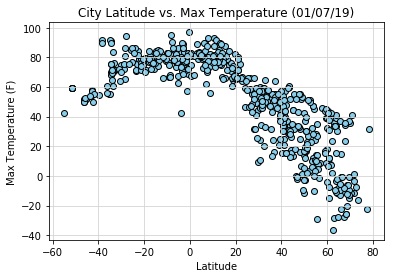

In [12]:
#plot lat v temp and save as .png
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

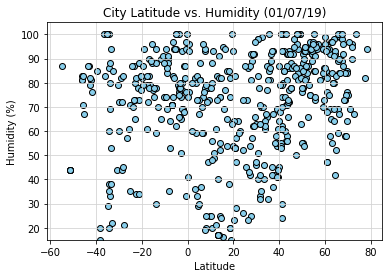

In [13]:
#plot lat v hum and save as .png
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

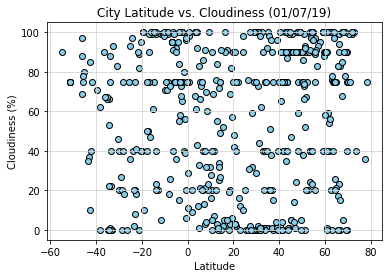

In [14]:
#plot lat v cloud and save as .png
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

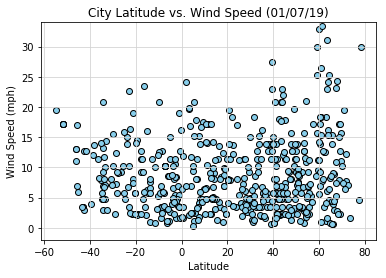

In [15]:
#plot lat v wind and save as .png
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression